In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

ERROR! Session/line number was not unique in database. History logging moved to new session 168


# Supervised Machine Learning

In [5]:
realestate = pd.read_csv('realestate.csv')

In [6]:
# view all columns
realestate
pd.options.display.max_columns = None

#### Data Wrangling

In [7]:
#### create x and y variables as their own array.

x = realestate[['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

In [8]:
y = realestate['Y house price of unit area']

In [9]:
realestate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


#### train test split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)

In [11]:
# to see the shape of the data you'll be using for the ML algorithm:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(248, 5) (248,)
(166, 5) (166,)


In [12]:
# Create the linear regression model
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

#### Interpreting Supervised ML Accuracy

In [13]:
# see what predictions your model has made about housing price:
predictions = lm.predict(x_test)
predictions

array([14.77852916,  8.35848599, 23.1113017 , 47.67384657, 30.05251015,
       37.468435  , 38.01762284, 41.08294225, 46.50080685, 40.34536509,
       43.87818623, 33.77279613, 40.08116941, 37.31066596, 46.15211908,
       48.22093568, 39.48594154, 46.43844951, 49.94962395, 47.552992  ,
       41.60580876, 52.60152777, 47.16226231, 37.48194878, 32.40811002,
       50.67597957, 39.35917038, 47.99287312, 45.4694465 , 39.33112551,
       49.61736207, 42.53188577, 42.96261018, 46.15577268, 44.94124757,
        7.13730951, 39.15074038, 39.77497805,  7.07979164, 54.43242047,
       31.26660065, 46.90435905, 24.89017208, 48.80711134, 42.6710441 ,
       50.08982154, 41.0044385 , 37.39701978, 44.86394799, 36.76558821,
       46.8133099 , 35.89912014, 42.35933217, 14.7421879 , 38.74428879,
       47.50157796, 43.06612319, 45.44985241, 43.77496083, 39.48259244,
       34.31225036, 45.52392252, 42.44560897, 42.0625614 , 51.89857656,
       42.74806676, 24.28752167, 48.68058491, 31.25018334, 40.06

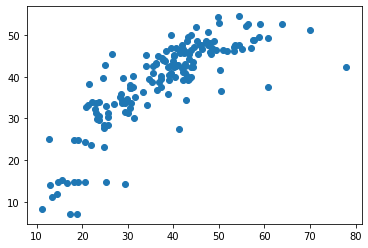

In [14]:
# create a scatterplot of the output values:
plt.scatter(y_test, predictions)

In [15]:
# determine the accuracy through quantitative methods to get a better idea.
# 1) Accuracy Score:
print("Score:", lm.score(x_test, y_test))

Score: 0.64423808451217


In [16]:
# 2) Examining Error:
# a) Mean Absolute Error
print("Score:", lm.score(x_test, y_test))

Score: 0.64423808451217


In [17]:
# b) Machine Squared Error: the square of the absolute error:
metrics.mean_squared_error(y_test, predictions)

54.375728544922424

In [18]:
# c) Root Mean Squared Error: most popular
np.sqrt(metrics.mean_squared_error(y_test, predictions))

7.373990001683107